In [22]:
#import necessary libraries

%matplotlib notebook
import numpy as np 
import pandas as pd 

#from sklearn.prepocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics  

#visualization and plots
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Reading the data 
iris_data = pd.read_csv("C:/Users/poona/OneDrive/Desktop/IRIS.csv")

In [15]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
#check few records
iris_data.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [17]:
#get to know about number of species (classes)
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
#if there is any NAN value
iris_data.isnull().values.any()

False

In [19]:
#check the distribution of class
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

C:\Users\poona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


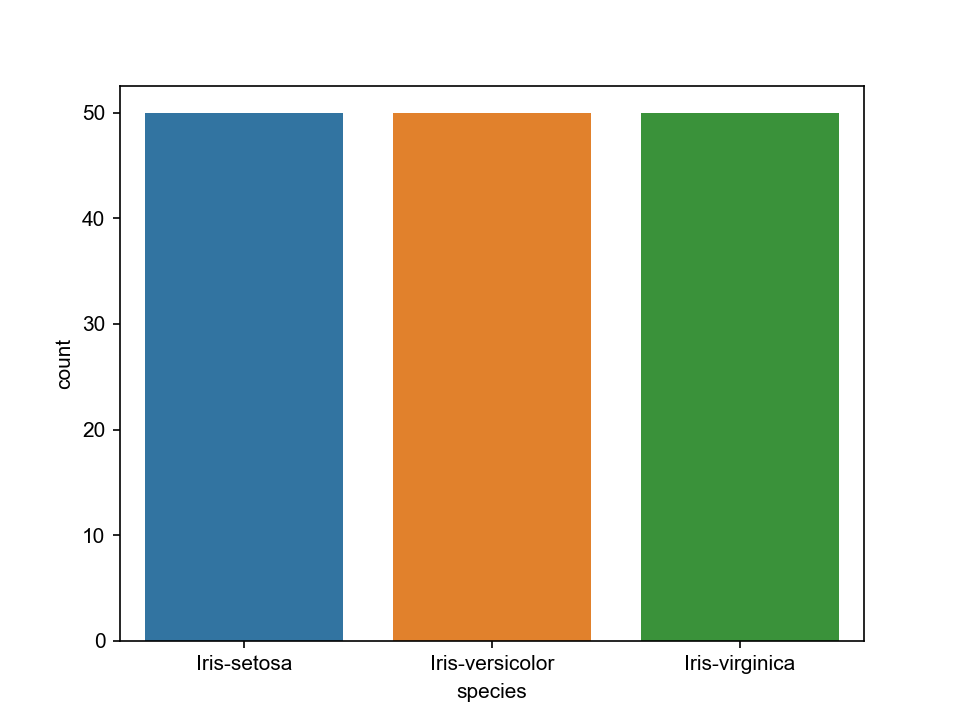

<AxesSubplot:xlabel='species', ylabel='count'>

In [23]:
sns.countplot(iris_data['species'])

C:\Users\poona\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


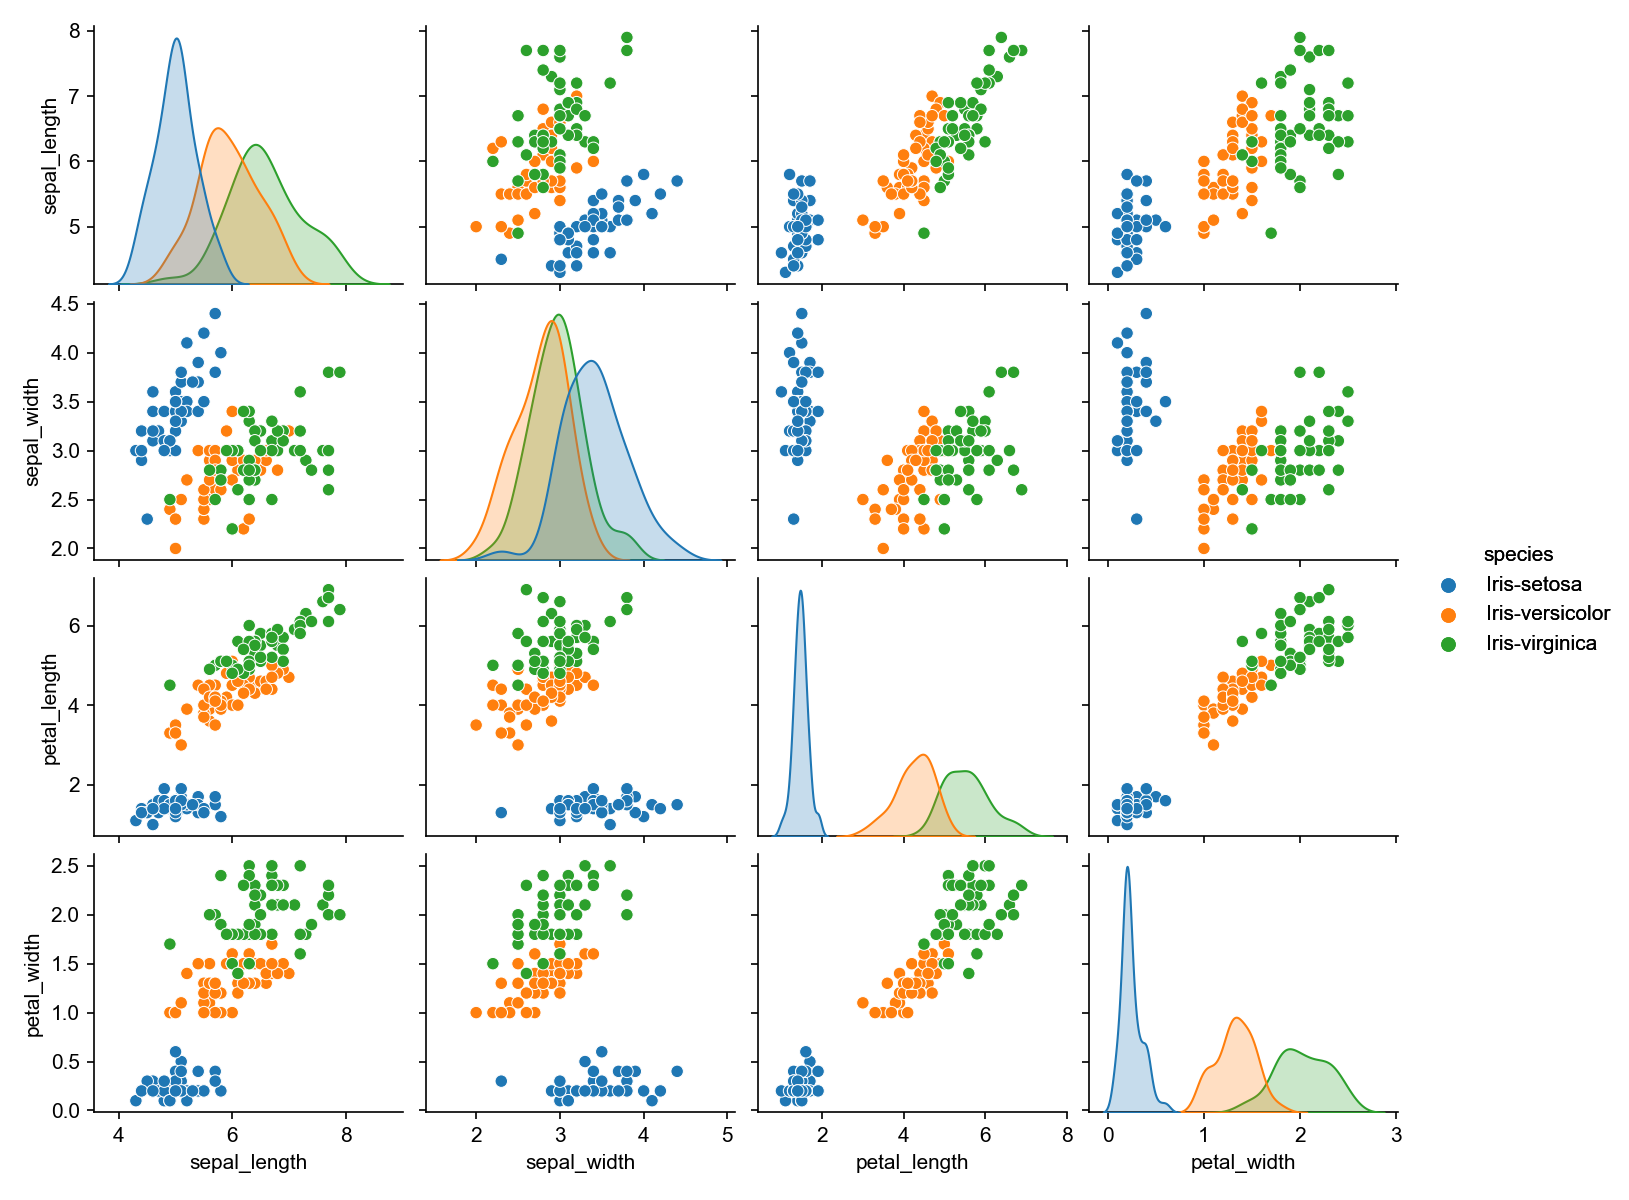

In [24]:
#pairwise scatter plot - Pair-Plot
sns.pairplot(iris_data, hue='species',size=2).add_legend()

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
#Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

<IPython.core.display.Javascript object>


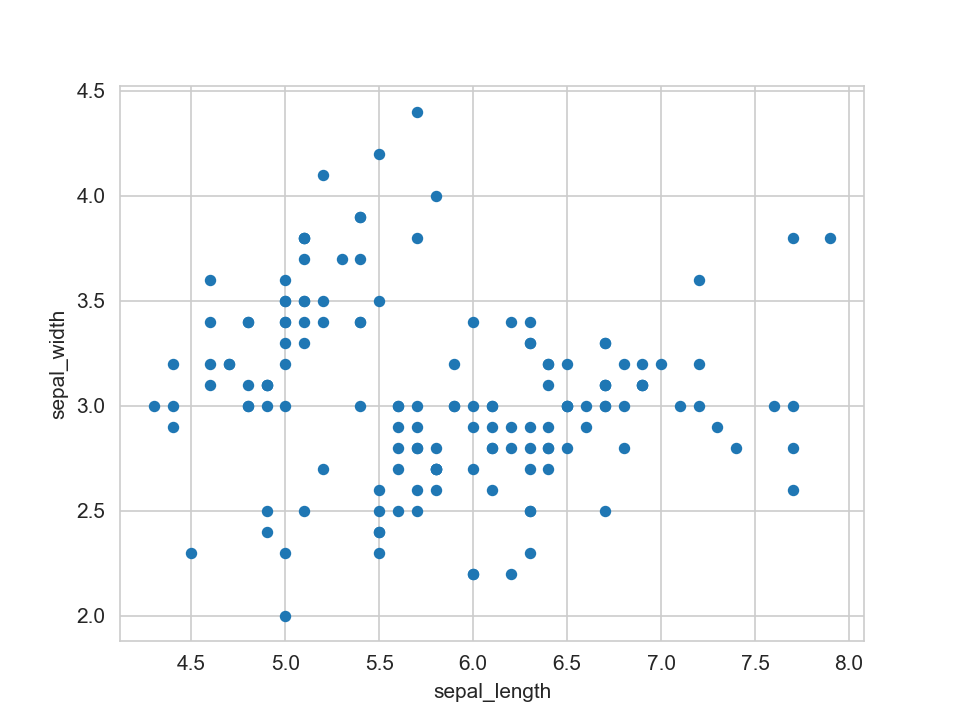

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

In [32]:
iris_data.plot(kind ='scatter', x='sepal_length', y='sepal_width')

<IPython.core.display.Javascript object>


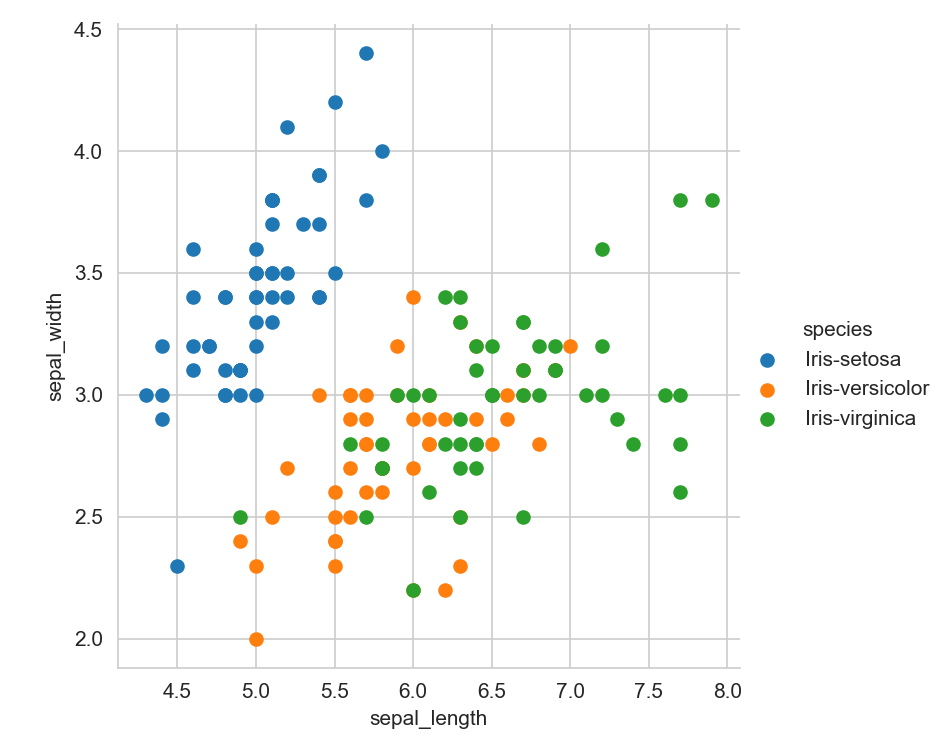

In [34]:
sns.set_style('whitegrid');
sns.FacetGrid(iris_data, hue='species',height=5)\
   .map(plt.scatter,'sepal_length','sepal_width')\
   .add_legend()
plt.show();

<IPython.core.display.Javascript object>


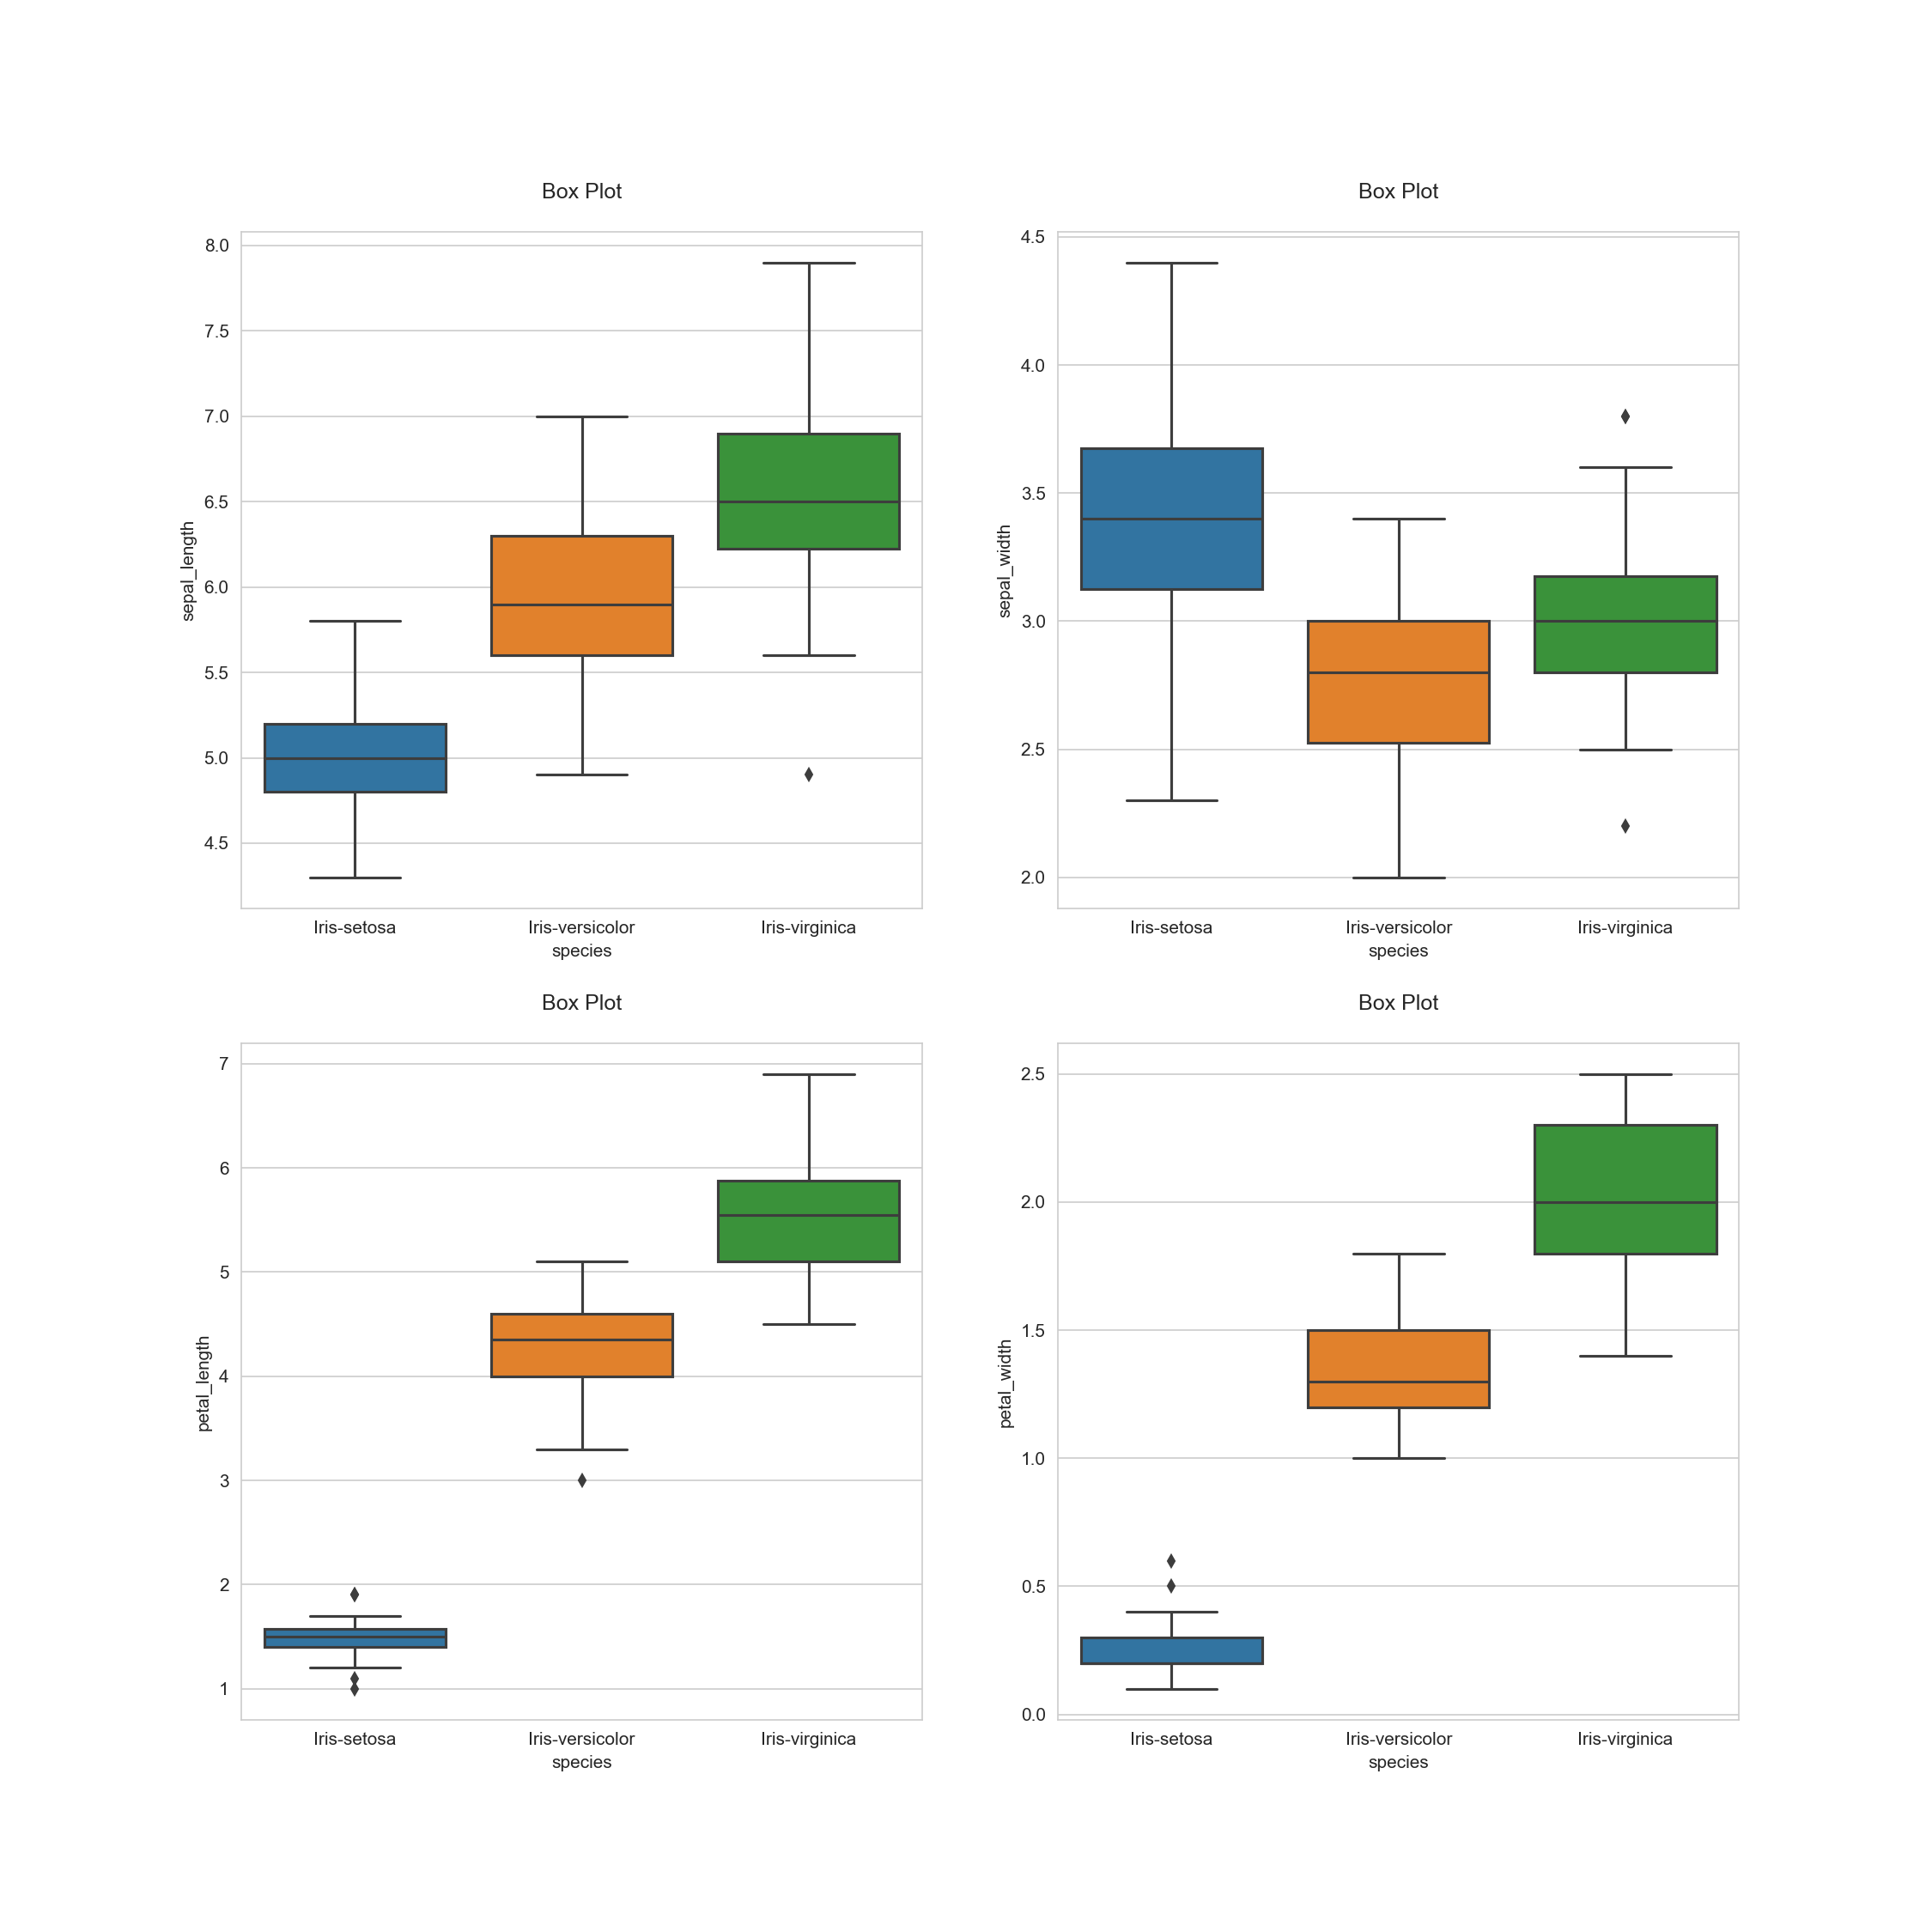

In [36]:

def graph(y):
    sns.boxplot(x="species", y=y, data=iris_data).set(title="Box Plot\n")



plt.figure(figsize=(15,15))
     

plt.subplot(221)
graph('sepal_length')
 
plt.subplot(222)
graph('sepal_width')
 
plt.subplot(223)
graph('petal_length')
 
plt.subplot(224)
graph('petal_width')
 
plt.show()

<IPython.core.display.Javascript object>


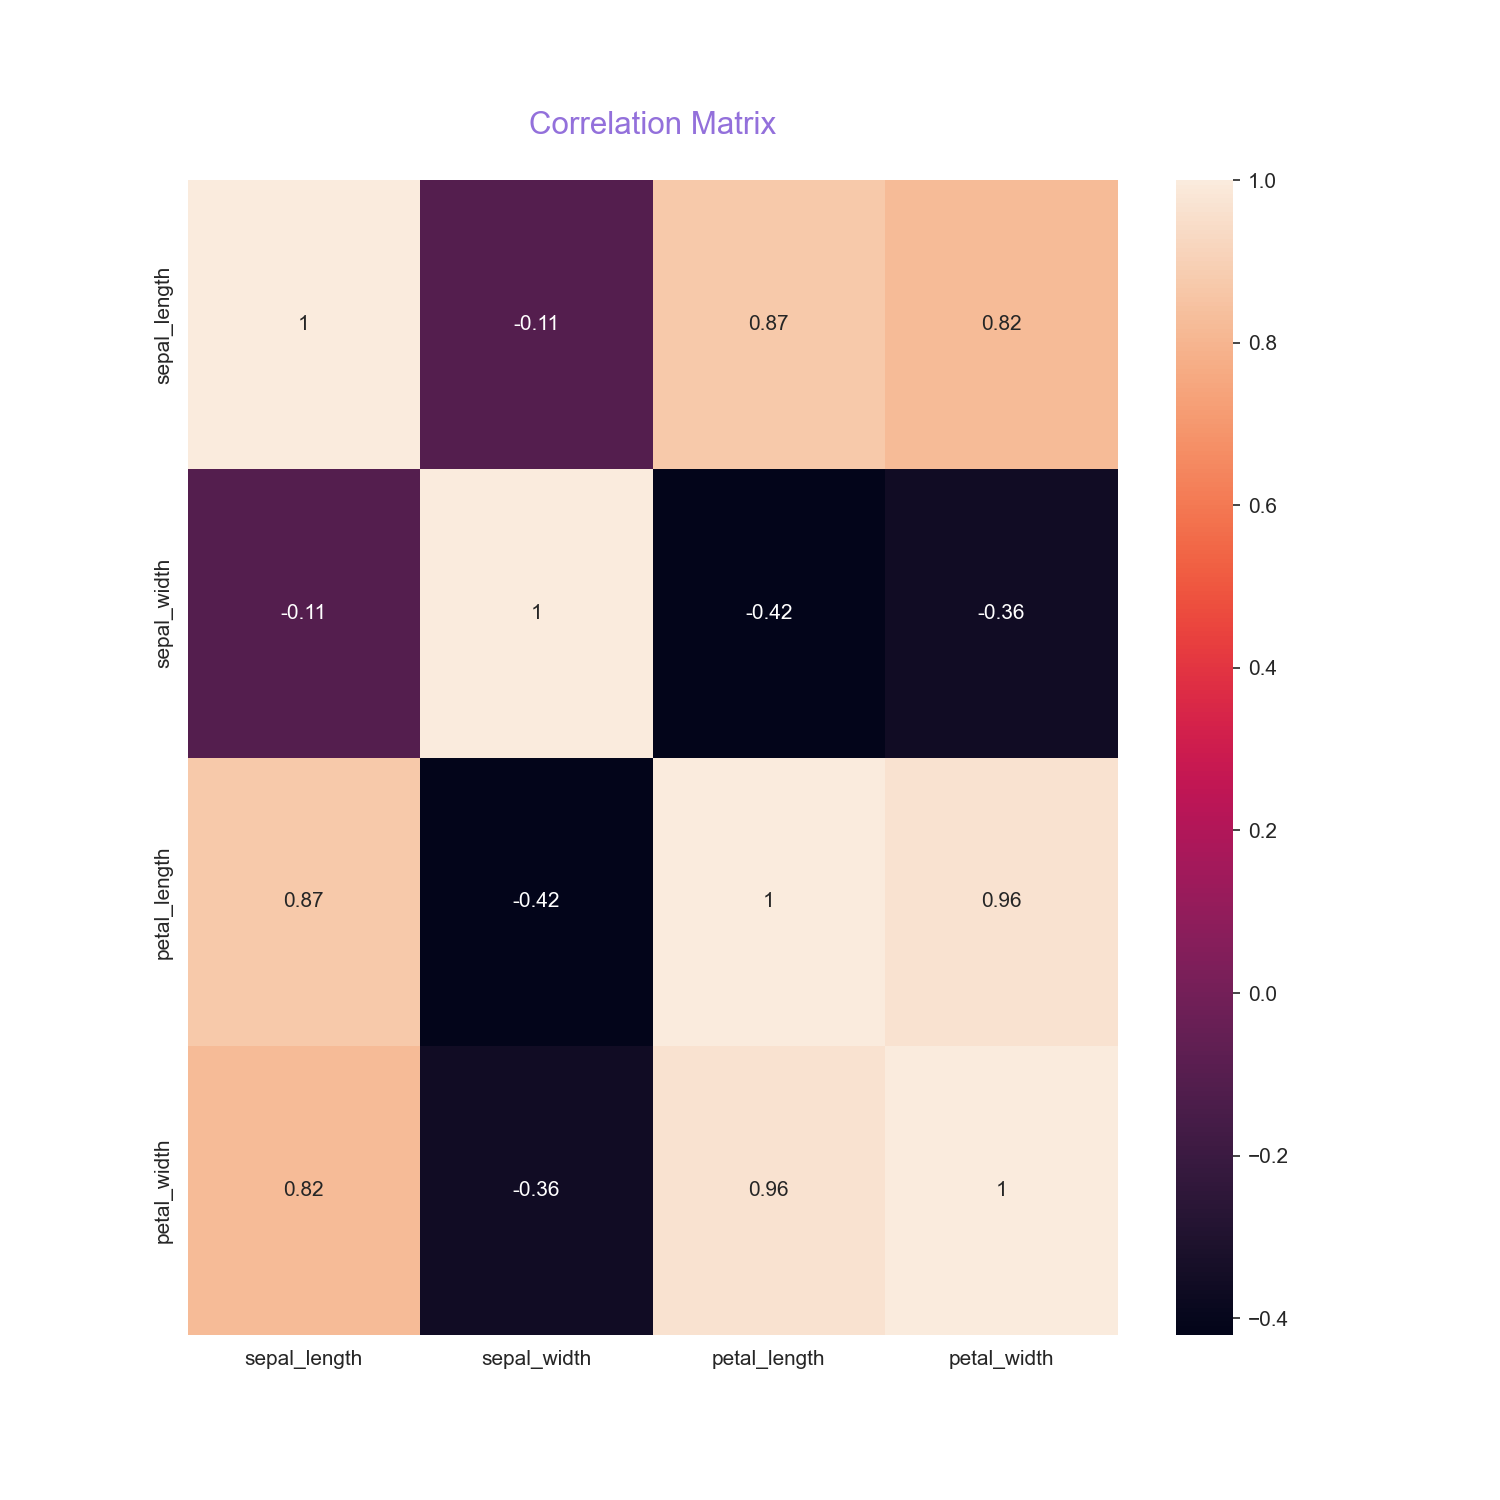

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(iris_data.corr(),annot=True)
plt.title("Correlation Matrix\n",fontsize=15,color="mediumpurple")
plt.show()

In [39]:
#Determine the Features & Target Variable
X = iris_data.drop('species' , axis=1)
y = iris_data['species']

In [40]:
#Split the Data to Train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

In [41]:
#Scaling the Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler()
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [42]:
#Train Model (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(scaled_X_train , y_train)
KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=2)

In [43]:
#Predicting Test Data
y_pred = knn_model.predict(scaled_X_test)
pd.DataFrame({'Y_Test':y_test, 'Y_Pred': y_pred}).head(5)

C:\Users\poona\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Y_Test,Y_Pred
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor


In [45]:
#Evaluating the Model
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
report = classification_report(y_test , y_pred)
print(report)


confusion_matrix(y_test, y_pred)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]], dtype=int64)

In [46]:
accuracy_score(y_test , y_pred)

0.9777777777777777

<IPython.core.display.Javascript object>


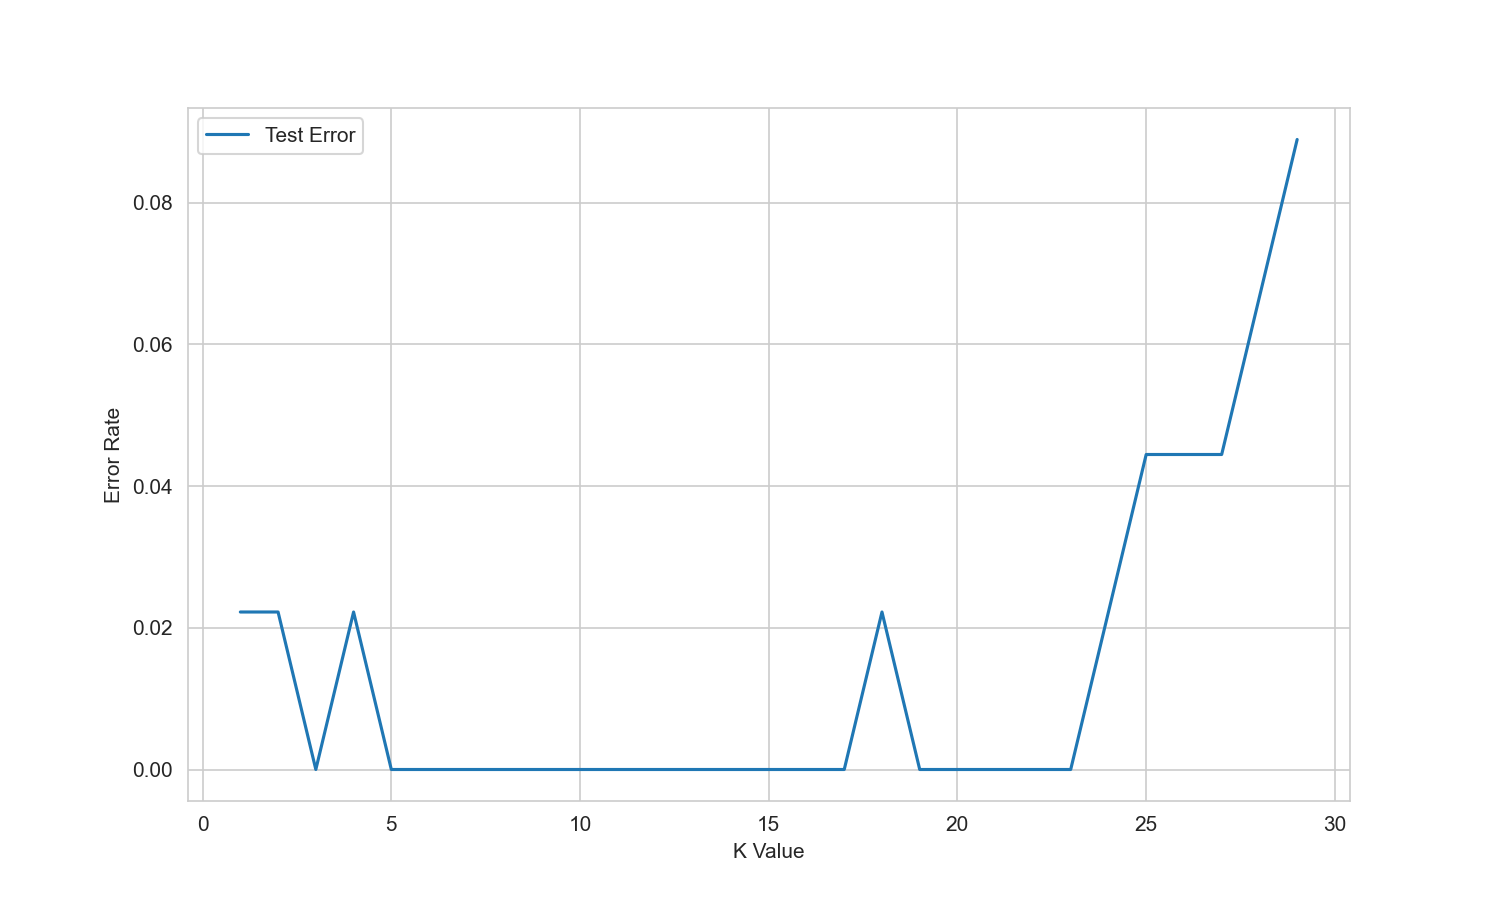

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 30), test_error_rate, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value');

In [53]:
#Creating a pipeline to find K Value
scaler = StandardScaler()
knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [57]:
operations = [ ('scaler' , scaler)  , ('knn' , knn)]
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)
from sklearn.model_selection import GridSearchCV
k_values = list(range(1,30))
param_grid= {'knn__n_neighbors': k_values}

In [58]:
full_cv_classifier =  GridSearchCV(pipe , param_grid , cv=5 , scoring='accuracy')

In [59]:
full_cv_classifier.fit(X_train , y_train)

C:\Users\poona\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\poona\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [60]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=10))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=10),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 10,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [ ]:
#FINAL MODEL

In [61]:
scaler = StandardScaler()
knn10 = KNeighborsClassifier(n_neighbors=10)
operations = [('scaler' , scaler) , ('knn10' , knn10)]

In [62]:
pipe = Pipeline(operations)

In [63]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn10', KNeighborsClassifier(n_neighbors=10))])

In [64]:
pipe_pred = pipe.predict(X_test)

C:\Users\poona\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [65]:
print(classification_report(y_test, pipe_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [66]:
accuracy_score(y_test , pipe_pred)

1.0

In [ ]:
#Yes. we got 100% accuracy.